# Introductory Examples
[Quant Econ](https://julia.quantecon.org/getting_started_julia/julia_by_example.html)

May 13th 2020

Taisei Noda

## Example: Plotting a White Noise Process

### Introduction to Packages

In [26]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")

Activated /Users/taisei/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.5.0


In [ ]:
using LinearAlgebra, Statistics

### Using Functions from a Package

In [2]:
randn()

-0.6238449543431942

In [5]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")

Activated /Users/taisei/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.5.0


**Note: Do not confuse with "plots". "P" must be capital.**

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260
┌ Warning: Package GR does not have UUIDs in its dependencies:
│ - If you have GR checked out for development and have
│   added UUIDs as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with GR
└ Loading UUIDs into GR from project dependency, future warnings for GR are suppressed.
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
│   exception = ErrorException("Required dependency GR [28b8d3ca-fb5f-59d9-8090-bfdbd6d07a71] failed to load from a cache file.")
└ @ Base loading.jl:1041
┌ Info: Precompiling GR [28b8d3ca-fb5f-59d9-8090-bfdbd6d07a71]
└ @ Base loading.jl:1260
┌ Warning: Package GR does not have UUIDs in its dependencies:
│ - If you have GR checked out for development and have
│   added UUIDs as a dependency b

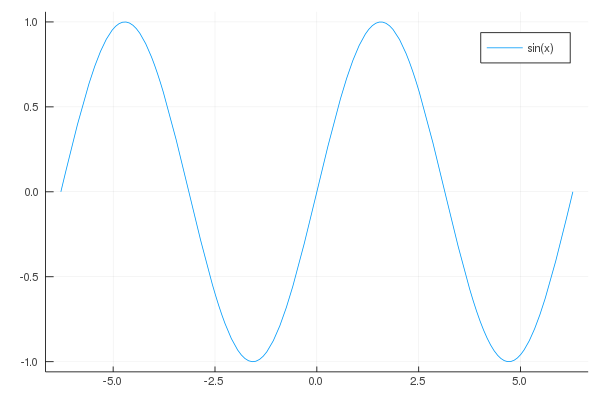

In [10]:
using Plots
gr(fmt=:png);
plot(sin, -2π, 2π, label="sin(x)")

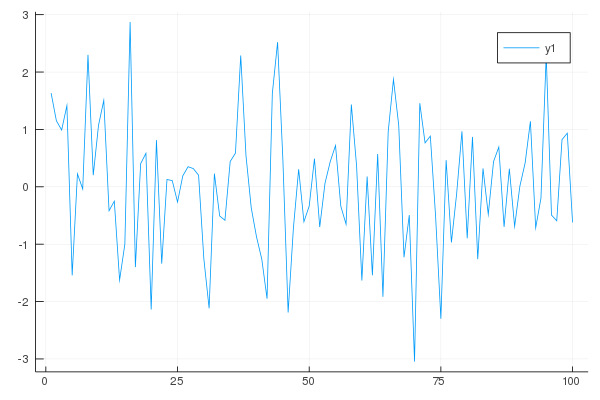

In [14]:
using Plots
gr(fmt=:png);

n=100
ϵ=randn(n)
plot(1:n, ϵ)

In [15]:
typeof(ϵ)

Array{Float64,1}

In [16]:
ϵ[1:5]

5-element Array{Float64,1}:
  1.6331800343356524
  1.1516135658903819
  0.9891660893958567
  1.4149284700146745
 -1.5436220986379579

In [17]:
?typeof

search: typeof typejoin TypeError



```
typeof(x)
```

Get the concrete type of `x`.

# Examples

```jldoctest
julia> a = 1//2;

julia> typeof(a)
Rational{Int64}

julia> M = [1 2; 3.5 4];

julia> typeof(M)
Array{Float64,2}
```


### For Loops

In [18]:
# poor style
n = 100
ϵ = zeros(n)
for i in 1:n
    ϵ[i] = randn()
end

In [23]:
# better style
n = 100
ϵ = zeros(n)
for i in eachindex(ϵ)
    ϵ[i]=randn()
end
typeof(ϵ)
ϵ[1:5]

5-element Array{Float64,1}:
  0.39453609854745547
 -2.4152270892038707
 -0.035490756030612546
 -0.25590005883396694
  0.20654432663229916

In [24]:
ϵ_sum = 0.0 # careful to use 0.0, instead of 0
m = 5
for ϵ_val in ϵ[1:m]
    ϵ_sum=ϵ_sum+ϵ_val
end
ϵ_mean=ϵ_sum/m

-0.42110749577773915

In [27]:
ϵ_mean ≈ mean(ϵ[1:m])
ϵ_mean ≈ sum(ϵ[1:m])/m

true

### User-Defined Functions

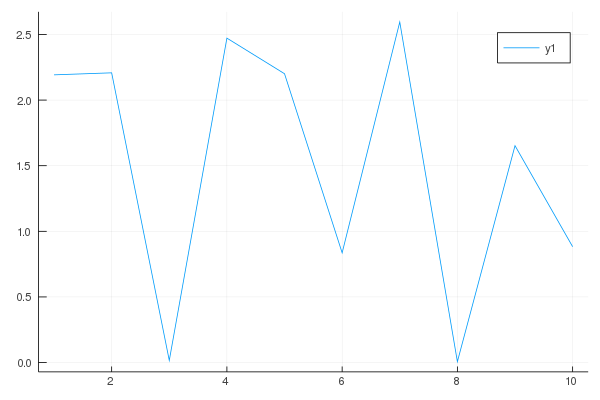

In [28]:
# poor style
function generatedata(n)
    ϵ = zeros(n)
    for i in eachindex(ϵ)
        ϵ[i] = (randn())^2
    end
    return ϵ
end

data = generatedata(10)
plot(data)

**"Function" and "return" are keywords.**

Notice this code is unnecessarily long.

In [29]:
# still poor style
function generatedata(n)
    ϵ=randn(n)
    
    for i in eachindex(ϵ)
        ϵ[i]=ϵ[i]^2
    end
    
    return ϵ
end
data=generatedata(5)

5-element Array{Float64,1}:
 0.9751035640786174
 1.966836919737087
 0.03629865152445401
 0.018394851918765602
 0.06382397049695396

Note: The looping over the i index to square the results is difficult to read.

In [31]:
# better style
function generatedata(n)
    ϵ=randn(n)
    return ϵ.^2
end
data = generatedata(5)

5-element Array{Float64,1}:
 0.0408722657573196
 0.267651688068554
 0.8084306230198028
 0.31433147966264136
 0.9462605307104639

Note: This is much clearer, but we can drop the "function".

In [32]:
# good style
generatedata(n)=randn(n).^2
data = generatedata(5)

5-element Array{Float64,1}:
 0.5486007352203656
 1.9024514218707644
 0.3384526949823916
 0.5429640272907723
 0.007195449724827966

In [30]:
# good style
f(x)=x^2 # simple square function
generatedata(n)=f.(randn(n)) # uses broadcast for some function `f`
data = generatedata(5)

5-element Array{Float64,1}:
 0.0017055170211398912
 0.15920241467139
 0.1647086845712983
 1.9407276621621192
 0.04788326561993961

In [33]:
generatedata(n,gen)=gen.(randn(n)) # uses broadcast for some function `gen`

f(x) = x^2 # simple square function
data = generatedata(5,f)

5-element Array{Float64,1}:
 0.10580421840471062
 2.6922109098155587
 3.2371529058051913
 2.883618965679524
 1.6865899064140792

**Note: Passing in a function f.** 

Although the code is not the shortest, this way is more general and Julia enables us to use these techniques with no performance overhead.

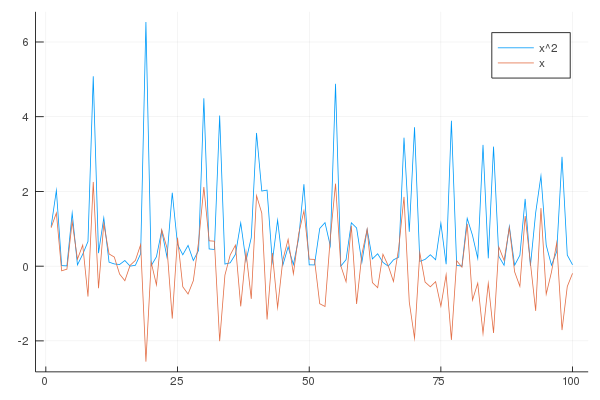

In [34]:
# direct solution with broadcasting, and small user-defined function
n = 100
f(x) = x^2

x= randn(n)
plot(f.(x),label="x^2")
plot!(x,label="x") # layer on the same plot

The additional function "plot!" adds a graph to the existing plot.
A function that modifies the arguments or a global state has a ! at the end of its name.

### A Slightly More Useful Function

* Distributions package

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1260


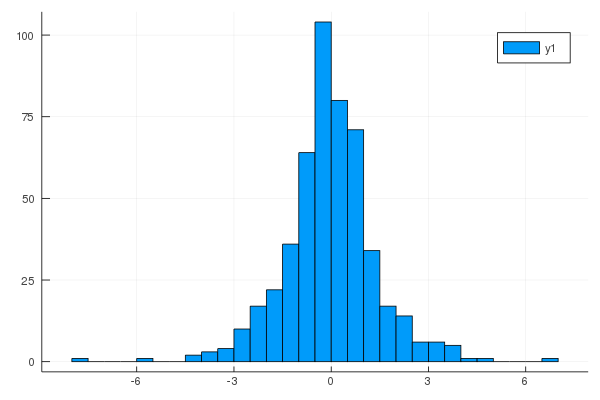

In [35]:
using Distributions

function plothistogram(distribution,n)
    ϵ=rand(distribution,n) # n draws from distribution
    histogram(ϵ)
end

lp=Laplace()
plothistogram(lp,500)

### A Mystery

"rand(n)" returns n uniform random variables on $[0,1)$.

In [36]:
rand(3)

3-element Array{Float64,1}:
 0.2728000389014231
 0.36244643872879934
 0.6189199557127059